In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
# from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
from scipy.stats import linregress
import numpy as np
import math as m
import vice
import sys
import os
sys.path.append("..")
from src.utils import oh_to_12pluslog, mu, mu_evol, get_velocity_profile, boxcarsmoothtrend
from src.simulations.models.insideout import insideout
from src.simulations.disks import diskmodel
from src.simulations.gasflows import angular_momentum_dilution
from src.simulations import inputs
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


In [2]:
from scipy.stats import linregress
import numpy as np
import vice
output = vice.output("../outputs/angular-momentum-dilution/betaphiin0p7")
zone_width = 0.1
radii = []
sigmag = []
for i in range(30, 120):
    zone = output.zones["zone%d" % (i)]
    radii.append(zone_width * i)
    area = np.pi * ((radii[-1] + zone_width)**2 - radii[-1]**2)
    sigmag.append(zone.history["mgas"][-1] / area)
lnsigmag = [m.log(_) for _ in sigmag]
prof = linregress(radii, lnsigmag)
dlnsigmag_dr = prof.slope
print(-1 / dlnsigmag_dr)

5.38950319790685


Tilting of the Metallicity Gradient
==

GCE models with radial gas flows generally predict some level of tilting in the metallicity gradient over time, even on small levels.
In this regard, the fact that the level of tilting observed between mono-age populations is relatively minimal is physically interesting.
Even though there are arguments for variations between $\nabla \approx -0.15$ kpc$^{-1}$ and $\nabla \approx -0.05$ kpc$^{-1}$, this is still small in the sense that it's well within an order of magnitude.

By the symmetry of second derivatives:

$$
\begin{align}
\frac{\partial}{\partial t} \left(
\frac{\partial \ln Z_\alpha}{\partial R}\right)
&=
\frac{-1}{Z_\alpha^2} \frac{\partial Z_\alpha}{\partial t} \frac{\partial Z_\alpha}{\partial R} +
\frac{1}{Z_\alpha}\frac{\partial^2 Z_\alpha}{\partial t \partial R}
\\
&= \frac{1}{Z_\alpha} \left( \frac{\partial^2 Z_\alpha}{\partial R \partial t} -
\frac{\partial \ln Z_\alpha}{\partial R} \frac{\partial Z_\alpha}{\partial t} \right)
\\
&= \frac{1}{Z_\alpha} \left[ \frac{\partial}{\partial R} \left(
\frac{y_\alpha}{\tau_\star} -
\frac{Z_\alpha}{\tau_\star} \left(
1 + \eta - \mu_\alpha - r + \tau_\star \frac{\dot \Sigma_g}{\Sigma_g}
\right)
\right) -
\frac{\partial \ln Z_\alpha}{\partial R} \left(
\frac{y_\alpha}{ \tau_\star} -
\frac{Z_\alpha}{\tau_\star} \left(
1 + \eta - \mu_\alpha - r +
\tau_\star \frac{\dot \Sigma_g}{\Sigma_g}
\right)
\right)
\right].
\end{align}
$$

At this point, for compactness, it is helpful to substitute in the following relation:

$$
\begin{align}
Z_{\alpha,\text{eq}}
&= \frac{y_\alpha}{1 + \eta - \mu_\alpha - r + \tau_\star \dot \Sigma_g / \Sigma_g}
\\
\implies \frac{y_\alpha}{Z_{\alpha,\text{eq}}}
&= 1 + \eta - \mu_\alpha - r + \tau_\star \dot \Sigma_g / \Sigma_g,
\end{align}
$$

which leads to the following next step:

$$
\begin{align}
\implies \frac{\partial}{\partial t} \left(
\frac{\partial \ln Z_\alpha}{\partial R} \right)
&= \frac{1}{Z_\alpha} \left[
\frac{\partial}{\partial R} \left(
\frac{y_\alpha}{\tau_\star} -
\frac{y_\alpha}{\tau_\star} \frac{Z_\alpha}{Z_{\alpha,\text{eq}}}
\right) -
\frac{\partial \ln Z_\alpha}{\partial R} \left(
\frac{y_\alpha}{\tau_\star} -
\frac{y_\alpha}{\tau_\star} \frac{Z_\alpha}{Z_{\alpha,\text{eq}}}
\right)
\right]
\\
&= \frac{y_\alpha}{Z_\alpha} \left[
\frac{\partial}{\partial R} \left(
\frac{1}{\tau_\star} \left(
1 - \frac{Z_\alpha}{Z_{\alpha,\text{eq}}}
\right)
\right)
- \frac{\partial \ln Z_\alpha}{\partial R} \left(
\frac{1}{\tau_\star} \left(
1 - \frac{Z_\alpha}{Z_{\alpha,\text{eq}}}
\right)
\right)
\right]
\\
&= \frac{y_\alpha}{Z_\alpha} \left[
\frac{-1}{\tau_\star} \frac{\partial \ln \tau_\star}{\partial R}
\left(1 - \frac{Z_\alpha}{Z_{\alpha,\text{eq}}} \right) -
\frac{Z_\alpha}{\tau_\star Z_{\alpha,\text{eq}}} \left(
\frac{\partial \ln Z_\alpha}{\partial R} -
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}
\right) -
\frac{1}{\tau_\star} \frac{\partial \ln Z_\alpha}{\partial R} +
\frac{Z_\alpha}{\tau_\star Z_{\alpha,\text{eq}}} \frac{\partial \ln Z_\alpha}{\partial R}
\right]
\\
&= \frac{y_\alpha}{Z_\alpha} \left[
\frac{-1}{\tau_\star} \frac{\partial \ln \tau_\star}{\partial R}
\left(1 - \frac{Z_\alpha}{Z_{\alpha,\text{eq}}} \right) +
\frac{Z_\alpha}{\tau_\star Z_{\alpha,\text{eq}}}
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} -
\frac{1}{\tau_\star} \frac{\partial \ln Z_\alpha}{\partial R}
\right]
\end{align}
$$

The above is a compact way to write the expression for the tilt rate.
We are interested in finding that gradient $\nabla$ such that $\dot \nabla = 0$, which is the equilibrium gradient $\nabla_\text{eq}$.
From the above, it follows that $\dot \nabla \ln Z_\alpha = 0$ when

$$
\begin{align}
\frac{\partial \ln Z_\alpha}{\partial R}
&= \frac{Z_\alpha}{Z_{\alpha,\text{eq}}} \frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} -
\left(1 - \frac{Z_\alpha}{Z_{\alpha,\text{eq}}}\right)
\frac{\partial \ln \tau_\star}{\partial R}
\end{align}
$$

With a Kennicutt-Schmidt relation of power-law index $N$:

$$
\begin{align}
\frac{\partial \ln \tau_\star}{\partial R} &=
\left(1 - N\right) \frac{\partial \ln \Sigma_g}{\partial R}
\\
\implies \nabla_\text{eq}
&= \frac{1}{\ln 10} \left[
\frac{Z_\alpha}{Z_{\alpha,\text{eq}}}
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} +
\left(1 - \frac{Z_\alpha}{Z_{\alpha,\text{eq}}}\right)
(N - 1) \frac{\partial \ln \Sigma_g}{\partial R}
\right].
\end{align}
$$

Based on the above expression, we can say that metallicity gradients should generically experience two regimes, given sufficient time.
The first regime occurs in the early epochs of disk formation when the local metallicity $Z_\alpha \ll Z_{\alpha,\text{eq}}$.
In this limit,

$$
\begin{align}
\nabla_\text{eq} &\approx \frac{N - 1}{\ln 10} \frac{\partial \ln \Sigma_g}{\partial R}
\\
&\lesssim \frac{-0.5}{R_g \ln 10}
\\
&\lesssim -0.058\text{ kpc}^{-1},
\end{align}
$$

where we denote this approximation as an upper limit, since the surface density of the ISM likely followed a sharper density profile at early epochs (i.e., smaller $R_g$).
In this case, the exponential scaling of $Z_\alpha$ follows a scale radius that is about twice that of the ISM surface density (i.e., $R_\alpha \approx 2 R_g$).

The second regime is $Z_\alpha \rightarrow Z_{\alpha,\text{eq}}$, which occurs at late epochs; in some chemical evolution scenarios, on timescales much longer than the disk lifetime.
In the equilibrium scenario, it happens in the first $\sim$few Gyr of the thin disk epoch.
In this regime,

$$
\nabla_\text{eq} \approx \frac{1}{\ln 10} \frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}.
$$

The radial profile is dominated by the equilibrium state.

Whether or not the gradient steepens, shallows, or holds steady on long timescales is a model-dependent question.
It depends on how star formation efficiency varied with radius at early epochs and what the eventual equilibrium gradient is.
If there are no substantial variations in star formation efficiency with radius at early times, then $\nabla_\text{eq} \approx 0$ at early times, and a relatively flat metallicity gradient is expected.
If $\nabla \ln Z_{\alpha,\text{eq}} \ll 0$, then the gradient should steepen significantly over the course of the disk lifetime.

Analytic Solutions to the Equilibrium Metallicity Gradient
==

The equilibrium gradient $\nabla_\text{eq} \log Z$ is closely related to the gradient in the equilibrium abundance $\nabla \log Z_\text{eq}$, which is unsurprising.
We therefore need a general solution to $\nabla \log Z_\text{eq}$.
For compactness, it is useful to write the equilibrium abundance in the following way

$$
Z_{\alpha,\text{eq}} = \frac{y_\alpha}{
\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} +
\tau_\star v_{r,g} \frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}
},
$$

which leads to the following expression for $\nabla \log Z_{\alpha,\text{eq}}$:

$$
\begin{align}
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} &= \frac{-1}{
\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} +
\tau_\star v_{r,g} \frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}
} \left[
\frac{\partial}{\partial R} \left(\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} \right) +
\tau_\star v_{r,g} \left(
\frac{\partial \ln \tau_\star}{\partial R} +
\frac{\partial \ln v_{r,g}}{\partial R}
\right)\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} +
\tau_\star v_{r,g} \frac{\partial^2 \ln Z_{\alpha,\text{eq}}}{\partial R^2}
\right]
\\
&\approx \frac{-1}{
\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} +
\tau_\star v_{r,g} \frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}
} \left[
\frac{\partial}{\partial R} \left(\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} \right) +
\tau_\star v_{r,g} \left(
\frac{\partial \ln \tau_\star}{\partial R} +
\frac{\partial \ln v_{r,g}}{\partial R}
\right)\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}
\right].
\end{align}
$$

In the second line, we have assumed the late-time equilibrium gradient to be "locally linear" (i.e., its second derivative is negligible).

Rerranging terms results in the following quadratic equation for $\nabla \ln Z_{\alpha,\text{eq}}$:

$$
\tau_\star v_{r,g} \left(\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}\right)^2 +
\left[\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} +
\tau_\star v_{r,g} \left(
\frac{\partial \ln \tau_\star}{\partial R} +
\frac{\partial \ln v_{r,g}}{\partial R}
\right)\right] \frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} +
\frac{\partial}{\partial R} \left(\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star}\right) = 0
$$

The solution to this expression can be written as

$$
\begin{align}
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} &=
\frac{-\alpha + \sqrt{\alpha^2 + \beta}}{2 \tau_\star v_{r,g}}
\\
\alpha &\equiv \frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} + \tau_\star v_{r,g} \left(
\frac{\partial \ln \tau_\star}{\partial R} +
\frac{\partial \ln v_{r,g}}{\partial R}
\right)
\\
&= 1 + \eta - r - \frac{\tau_\star}{N \tau_\text{sfh}} +
\tau_\star v_{r,g} \left(
\frac{1}{R} + \frac{\partial \ln \Sigma_g}{\partial R} +
\frac{\partial \ln \tau_\star}{\partial R} +
2 \frac{\partial \ln v_{r,g}}{\partial R}
\right)
\\
\beta &\equiv -4 \tau_\star v_{r,g} \frac{\partial}{\partial R}
\left(\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star}\right)
\\
&= 4 \tau_\star v_{r,g} \left[
\frac{\partial \mu_g}{\partial R} +
\frac{\tau_\star}{N \tau_\text{sfh}} \left(
\frac{\partial \ln \tau_\star}{\partial R} +
\frac{\partial \ln v_{r,g}}{\partial R}
\right) -
\frac{\partial \eta}{\partial R}
\right]
\end{align}
$$

In [2]:
class container:
    pass

class gradeq:

    TAUDISK = 13.2

    def gradeq(self, taustar, vgas, *args, **kwargs):
        soln = container()
        soln.xi1 = self.xi1(taustar, vgas, *args, **kwargs)
        soln.xi2 = self.xi2(taustar, vgas, *args, **kwargs)
        soln.taueq = self.taueq(taustar, vgas, *args, **kwargs)
        soln.dlntaustardr = self.dlntaustardr(taustar, vgas, *args, **kwargs)
        soln.z_on_zeq = (1 - m.exp(-gradeq.TAUDISK / soln.taueq))
        soln.dlnzeqdr = gradeq.quadratic_soln(soln.xi1, soln.xi2, taustar, vgas)
        soln.deqlnzdr = gradeq.diseq_correction(soln.dlnzeqdr, soln.dlntaustardr, z_on_zeq = soln.z_on_zeq)
        soln.taunabla = 1 / (1 / soln.taueq + vgas * soln.dlnzeqdr)
        soln.dlnzismdr = (1 - m.exp(-(gradeq.TAUDISK - soln.taunabla) / soln.taueq)) * soln.dlnzeqdr
        soln.dlnzismdr -= m.exp(-(gradeq.TAUDISK - soln.taunabla) / soln.taueq) * soln.dlntaustardr
        return soln

    def print_soln(self, taustar, vgas, *args, **kwargs):
        soln = self.gradeq(taustar, vgas, *args, **kwargs)
        print("grad_logzeq = %.4f dex/kpc" % (soln.dlnzeqdr / m.log(10)))
        print("gradeq_logz = %.4f dex/kpc" % (soln.deqlnzdr / m.log(10)))
        print("grad_logzism = %.4f dex/kpc" % (soln.dlnzismdr / m.log(10)))

    @staticmethod
    def quadratic_soln(xi1, xi2, taustar, vgas):
        try:
            return (-xi1 + m.sqrt(xi1**2 + xi2)) / (2 * taustar * vgas)
        except ValueError:
            return float("nan")

    @staticmethod
    def diseq_correction(dlnzeqdr, dlntaustardr, z_on_zeq = 1):
        return z_on_zeq * dlnzeqdr - (1 - z_on_zeq) * dlntaustardr

No Radial Flow
--

With no radial flows, the quadratic expression above breaks down, since $v_{r,g} = 0$.
We instead differentiate the original expression $Z_{\alpha,\text{eq}} = y_\alpha / (1 + \eta - r - \tau_star / N \tau_\text{sfh})$ with radius.
In the $\eta = 0$ limit, this leads to:

$$
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} =
\frac{\tau_\star / N \tau_\text{sfh}}{1 - r - \tau_\star / N \tau_\text{sfh}} \left(
\frac{\partial \ln \tau_\star}{\partial R} -
\frac{\partial \ln \tau_\text{sfh}}{\partial R}
\right).
$$

The only substitution worth making is for $\nabla \ln \tau_\star$:

$$
\begin{align}
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} &=
\frac{\tau_\star / N \tau_\text{sfh}}{1 - r - \tau_\star / N \tau_\text{sfh}} \left[
(1 - N) \frac{\partial \ln \Sigma_g}{\partial R} -
\frac{\partial \ln \tau_\text{sfh}}{\partial R}
\right]
\\
&= \frac{\tau_\star / N \tau_\text{sfh}}{1 - r - \tau_\star / N \tau_\text{sfh}} \left(
\frac{N - 1}{R_g} - \frac{1}{R_\text{sfh}} \right)
\end{align}
$$

In [3]:
class noflow(gradeq):

    def gradeq(self, taustar, vgas, *args, **kwargs):
        soln = container()
        soln.xi1 = None
        soln.xi2 = None
        soln.taueq = self.taueq(taustar, vgas, *args, **kwargs)
        soln.dlntaustardr = self.dlntaustardr(taustar, vgas, *args, **kwargs)
        soln.z_on_zeq = 1 - m.exp(-gradeq.TAUDISK / soln.taueq)
        soln.dlnzeqdr = noflow.dlnzeqdr(taustar, vgas, *args, **kwargs)
        soln.deqlnzdr = gradeq.diseq_correction(soln.dlnzeqdr, soln.dlntaustardr, z_on_zeq = soln.z_on_zeq)
        soln.taunabla = 1 / (1 / soln.taueq + vgas * soln.dlnzeqdr)
        soln.dlnzismdr = (1 - m.exp(-(gradeq.TAUDISK - soln.taunabla) / soln.taueq)) * soln.dlnzeqdr
        soln.dlnzismdr -= m.exp(-(gradeq.TAUDISK - soln.taunabla) / soln.taueq) * soln.dlntaustardr
        return soln

    @staticmethod
    def dlnzeqdr(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        numerator = taustar / (N * tausfh)
        denominator = 1 - recycling - numerator
        return numerator / denominator * ((N - 1) / Rg - 1 / Rsfh)

    @staticmethod
    def taueq(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        return 1 / ((1 - recycling) / taustar - 1 / (N * tausfh))
    
    @staticmethod
    def dlntaustardr(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        return (N - 1) / Rg

In [5]:
noflow().print_soln(2, 0, N = 1)
print("=============")
noflow().print_soln(4, 0, N = 1.5)

grad_logzeq = -0.0319 dex/kpc
gradeq_logz = -0.0302 dex/kpc
grad_logzism = -0.0273 dex/kpc
grad_logzeq = -0.0179 dex/kpc
gradeq_logz = -0.0288 dex/kpc
grad_logzism = -0.0475 dex/kpc


We compute $\nabla_\text{eq} [\alpha/\text{H}] = -0.0201$ kpc$^{-1}$ for $N = 1$ and $\tau_\star = 2$ Gyr everywhere.
We instead get $\nabla_\text{eq} [\alpha/\text{H}] = -0.0327$ kpc$^{-1}$ with $N = 1.5$ and $\tau_\star = 4$ Gyr at the solar radius.
Each of these values use a disequilibrium correction of $Z_\alpha / Z_{\alpha,\text{eq}} = 10^{-0.2}$.
The expected equilibrium gradients become steeper for larger disequilibrium corrections, indicating that the gradients in these models should become shallower with time as $Z_\alpha \rightarrow Z_{\alpha,\text{eq}}$.

In [6]:
# # taustar = 4 # Gyr
# taustar = 2
# tausfh = 13 # Gyr
# # N = 1.5
# N = 1.0
# recycling = 0.4
# # Rg = 3.75 # kpc
# Rg = 2.5
# Rsfh = 4.7 #kpc
# # z_on_zeq = 10**-0.2
# taubar = 1 / ((1 - recycling) / taustar - 1 / (N * tausfh))
# print(taubar)
# z_on_zeq = 1 - m.exp(-13.2 / taubar)
# print(z_on_zeq)
# print(m.log10(z_on_zeq))

# numerator = taustar / (N * tausfh)
# denominator = 1 - recycling - numerator
# dlnzeq_dr = numerator / denominator * ((N - 1) / Rg - 1 / Rsfh)
# print(dlnzeq_dr / m.log(10))
# gradeq = z_on_zeq * dlnzeq_dr + (1 - z_on_zeq) * (1 - N) / Rg
# gradeq /= m.log(10)
# print(gradeq)

# # x = m.exp(1 - 13.2 / taubar)
# # gradism = (1 - x) * dlnzeq_dr + x * (1 - N) / Rg
# # gradism /= m.log(10)
# # print(gradism)

# taunabla = taubar
# gradism = (1 - m.exp(1 - 13.2 / taunabla)) * dlnzeq_dr + m.exp(1 - 13.2 / taunabla) * (1 - N) / Rg
# print(gradism / m.log(10))

Constant Velocity
--

If the velocity profile is flat with radius, then by definition:

$$
\begin{align}
\frac{\partial \ln v_{r,g}}{\partial R} &= 0
\\
\implies \mu_g &= -\tau_\star v_{r,g} \left(
\frac{1}{R} + \frac{\partial \ln \Sigma_g}{\partial R} \right)
\\
&= \tau_\star v_{r,g} \left(\frac{1}{R_g} - \frac{1}{R}\right),
\end{align}
$$

where $R_g \approx 3.75$ kpc is the scale radius of the ISM surface density.
Continuing:

$$
\begin{align}
\frac{\partial \mu_g}{\partial R}
&= \frac{-\partial \tau_\star}{\partial R} v_{r,g} \left(
\frac{1}{R} + \frac{\partial \ln \Sigma_g}{\partial R} \right) -
\tau_\star v_{r,g} \left(
\frac{-1}{R^2} + \frac{\partial^2 \ln \Sigma_g}{\partial R^2}\right)
\\
&\approx -\tau_\star v_{r,g} \left[
\frac{\partial \ln \tau_\star}{\partial R} \left(
\frac{1}{R} + \frac{\partial \ln \Sigma_g}{\partial R} \right) -
\frac{1}{R^2}
\right]
\\
&\approx -\tau_\star v_{r,g} \left[
(1 - N)\frac{\partial \ln \Sigma_g}{\partial R} \left(
\frac{1}{R} + \frac{\partial \ln \Sigma_g}{\partial R} \right) -
\frac{1}{R^2}
\right]
\\
&\approx \tau_\star v_{r,g} \left(
\frac{1 - N}{R R_g} -
\frac{1 - N}{R_g^2} +
\frac{1}{R^2}
\right)
\end{align}
$$

Plugging into the expression for $\partial \ln Z_{\alpha,\text{eq}} / \partial R$ and applying the limit that $\eta \rightarrow 0$:

$$
\begin{split}
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}
&= \left[
\tau_\star v_{r,g} \left(
\frac{1 - N}{R R_g} -
\frac{1 - N}{R_g^2} +
\frac{1}{R^2}
\right) +
\frac{\tau_\star}{N \tau_\text{sfh}} \left(
(1 - N)\frac{\partial \ln \Sigma_g}{\partial R} -
\frac{\partial \ln \tau_\text{sfh}}{\partial R}
\right)
\right]
\left(
1 - r - \frac{\tau_\star}{N \tau_\text{sfh}} -
\tau_\star v_{r,g} \left(\frac{1}{R_g} - \frac{1}{R}\right)
\right)^{-1}
\\
&= \left[
\tau_\star v_{r,g} \left(
\frac{1 - N}{R R_g} -
\frac{1 - N}{R_g^2} +
\frac{1}{R^2}
\right) +
\frac{\tau_\star}{N \tau_\text{sfh}} \left(
\frac{N - 1}{R_g} - \frac{1}{R_\text{sfh}}
\right)
\right]
\left(
1 - r - \frac{\tau_\star}{N \tau_\text{sfh}} -
\tau_\star v_{r,g} \left(\frac{1}{R_g} - \frac{1}{R}\right)
\right)^{-1}
\\
&\approx \left[
\tau_\star v_{r,g} \frac{N - 1}{R_g^2} +
\frac{\tau_\star}{N \tau_\text{sfh}} \left(
\frac{N - 1}{R_g} - \frac{1}{R_\text{sfh}}
\right)
\right]
\left(
1 - r - \frac{\tau_\star}{N \tau_\text{sfh}} -
\frac{\tau_\star v_{r,g}}{R_g}
\right)^{-1},
\end{split}
$$

where we approximate $1 / R \rightarrow 0$ in the final line.

In [4]:
class const(gradeq):

    @staticmethod
    def xi1(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        return 1 - recycling - taustar / (N * tausfh) + taustar * vgas * (1 / R + (N - 2) / Rg)

    @staticmethod
    def xi2(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        # _xi2 = (N - 1) * taustar * vgas / Rg**2 + taustar / (N * tausfh) * ((N - 1) / Rg - 1 / Rsfh)
        _xi2 = taustar * vgas * (1 / R**2 + (N - 1) / Rg**2 - (N - 1) / (R * Rg))
        _xi2 += taustar / (N * tausfh) * ((N - 1) / Rg - 1 / Rsfh)
        _xi2 *= 4 * taustar * vgas
        return _xi2

    @staticmethod
    def taueq(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        mu = taustar * vgas * (1 / Rg - 1 / R)
        return 1 / ((1 - mu - recycling) / taustar - 1 / (N * tausfh))

    @staticmethod
    def dlntaustardr(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        return (N - 1) / Rg

In [14]:
const().print_soln(4, -0.5)
const().print_soln(4, -1.0)
const().print_soln(4, -1.5)

grad_logzeq = -0.0555 dex/kpc
gradeq_logz = -0.0558 dex/kpc
grad_logzism = -0.0561 dex/kpc
grad_logzeq = -0.0652 dex/kpc
gradeq_logz = -0.0649 dex/kpc
grad_logzism = -0.0646 dex/kpc
grad_logzeq = -0.0692 dex/kpc
gradeq_logz = -0.0690 dex/kpc
grad_logzism = -0.0689 dex/kpc


We therefore estimate $\nabla_\text{eq} [\alpha/\text{H}] = -0.053$ kpc$^{-1}$, which is in reasonable agreement with our numerical models ($\nabla [\alpha/\text{H}] \approx -0.06$ kpc$^{-1}$) for an analytic approximation.

In [9]:
# N = 1.5
# Rg = 3.75
# vgas = -1
# taustar = 4
# recycling = 0.4
# tausfh = 13
# Rsfh = 4.7
# R = 8
# mu = taustar * vgas * (1 / Rg - 1 / R)
# taubar = 1 / ((1 - mu - recycling) / taustar - 1 / (N * tausfh))
# z_on_zeq = 1 - m.exp(-13.2 / taubar)
# print(z_on_zeq)
# print(m.log10(z_on_zeq))

# alpha = 1 - recycling - taustar / (N * tausfh) + taustar * vgas * (1 / R + (N - 2) / Rg)
# beta = (N - 1) * taustar * vgas / Rg**2 + taustar / (N * tausfh) * ((N - 1) / Rg - 1 / Rsfh)
# beta *= 4 * taustar * vgas
# dlnzeqdr = (-alpha + m.sqrt(alpha**2 + beta)) / (2 * taustar * vgas)
# print(dlnzeqdr / m.log(10))
# gradeq = z_on_zeq * dlnzeqdr + (1 - z_on_zeq) * (1 - N) / Rg
# gradeq /= m.log(10)
# print(gradeq)

# taunabla = 1 / (1 / taubar + vgas * dlnzeqdr)
# taudisk = 13.2
# gradism = (1 - m.exp(-(taudisk - taunabla) / taubar)) * dlnzeqdr
# gradism += m.exp(-(taudisk - taunabla) / taubar) * (1 - N) / Rg
# print(gradism / m.log(10))

Potential Well Deepening
--

In the potential well deepening scenario, the velocity profile is linear with a slope set by the growth in stellar mass:

$$
\begin{split}
v_{r,g} &= -R \gamma \frac{\partial \ln M_\star}{\partial t}
\\
\implies \frac{\partial \ln v_{r,g}}{\partial R} &= \frac{1}{R}
\\
\implies \mu_g &= -\tau_\star v_{r,g} \left(
\frac{2}{R} + \frac{\partial \ln \Sigma_g}{\partial R} \right)
\\
\implies \frac{\partial \mu_g}{\partial R}
&= -\tau_\star v_{r,g} \left(
\frac{\partial \ln \tau_\star}{\partial R} +
\frac{\partial \ln v_{r,g}}{\partial R}
\right)\left(
\frac{1}{R} + \frac{\partial \ln \Sigma_g}{\partial R} \right) -
\tau_\star v_{r,g} \left(
\frac{-2}{R^2} + \frac{\partial^2 \ln \Sigma_g}{\partial R^2} \right)
\\
&= -\tau_\star v_{r,g} \left[
\left(\frac{1}{R} + (1 - N) \frac{\partial \ln \Sigma_g}{\partial R}\right)
\left(\frac{1}{R} + \frac{\partial \ln \Sigma_g}{\partial R}\right) -
\frac{2}{R^2} +
\frac{\partial^2 \ln \Sigma_g}{\partial R^2}
\right]
\\
&\approx \tau_\star v_{r,g} \frac{N - 1}{R_g^2},
\end{split}
$$

where we approximate $1 / R \rightarrow 0$ in the final line and substitute in $\partial \ln \Sigma_g / \partial R = -1 / R_g$.
We also approximate the gradient as being "locally exponential," in the sense that $\partial^2 \ln \Sigma_g / \partial R^2 \approx 0$.

This leads to the following approximation for $\partial \ln Z_{\alpha,\text{eq}} / \partial R$:

$$
\begin{split}
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}
&\approx \left[
\tau_\star v_{r,g} \frac{N - 1}{R_g^2} +
\frac{\tau_\star}{N \tau_\text{sfh}} \left(
(1 - N) \frac{\partial \ln \Sigma_g}{\partial R} -
\frac{\partial \ln \tau_\text{sfh}}{\partial R}
\right)
\right] \left(
1 - r - \frac{\tau_\star}{N \tau_\text{sfh}} +
\tau_\star v_{r,g} \left(\frac{2}{R} +
\frac{\partial \ln \Sigma_g}{\partial R}\right)
\right)^{-1}
\\
&\approx \left[
\tau_\star v_{r,g} \frac{N - 1}{R_g^2} +
\frac{\tau_\star}{N \tau_\text{sfh}} \left(
\frac{N - 1}{R_g} -
\frac{1}{R_\text{sfh}}
\right)
\right] \left(
1 - r - \frac{\tau_\star}{N \tau_\text{sfh}} -
\frac{\tau_\star v_{r,g}}{R_g}
\right)^{-1},
\end{split}
$$

which has the same form as our approximation for the constant velocity scenario.
The predictions are different, however, because the velocity and $Z_\alpha / Z_{\alpha,\text{eq}}$ are different.

In [8]:
import vice
out = vice.output("../outputs/potential-well-deepening/gamma0p2")
sfr = 0
mstar = 0
for i in range(len(out.zones.keys())):
    mstar += out.zones["zone%d" % (i)].history["mstar"][-1]
    sfr += 0.6 * out.zones["zone%d" % (i)].history["sfr"][-1] * 1.e9
print(out.zones["zone80"].history["r_eff"][-1])
print(out.zones["zone80"].history["mgas"][-1] / out.zones["zone80"].history["sfr"][-1] * 1.e-9)
print(sfr)
print(mstar)
print(sfr / mstar)

0.4972159
4.049528377640496
2438039126.4119983
50550654886.0
0.048229624955604934


In [5]:
class pwd(gradeq):

    @staticmethod
    def vgas(gamma, R = 8, dlnmstardt = 0.048):
        return -gamma * R * dlnmstardt

    @staticmethod
    def xi1(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        return 1 - recycling - taustar / (N * tausfh) + taustar * vgas * (3 / R + (N - 2) / Rg)

    @staticmethod
    def xi2(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        _xi2 = 4 * taustar**2 * vgas**2 * (2 / R**2 - (2 / R - 1 / Rg) * ((N - 1) / Rg + 1 / R))
        _xi2 += 4 * taustar**2 * vgas / (N * tausfh) * ((N - 1) / Rg - 1 / Rsfh)
        return _xi2

    @staticmethod
    def taueq(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        mu = taustar * vgas * (1 / Rg - 2 / R)
        return 1 / ((1 - mu - recycling) / taustar - 1 / (N * tausfh))

    @staticmethod
    def dlntaustardr(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8):
        return (N - 1) / Rg

In [10]:
pwd().print_soln(4, pwd.vgas(0.1))
print("==========")
pwd().print_soln(4, pwd.vgas(0.2))
print("==========")
pwd().print_soln(4, pwd.vgas(0.3))

grad_logzeq = -0.0258 dex/kpc
gradeq_logz = -0.0344 dex/kpc
grad_logzism = -0.0488 dex/kpc
grad_logzeq = -0.0343 dex/kpc
gradeq_logz = -0.0406 dex/kpc
grad_logzism = -0.0505 dex/kpc
grad_logzeq = -0.0431 dex/kpc
gradeq_logz = -0.0470 dex/kpc
grad_logzism = -0.0527 dex/kpc


In [16]:
pwd().print_soln(4, pwd.vgas(0.1, dlnmstardt = 0.024))
print("==========")
pwd().print_soln(4, pwd.vgas(0.2, dlnmstardt = 0.024))
print("==========")
pwd().print_soln(4, pwd.vgas(0.3, dlnmstardt = 0.024))

grad_logzeq = -0.0217 dex/kpc
gradeq_logz = -0.0315 dex/kpc
grad_logzism = -0.0481 dex/kpc
grad_logzeq = -0.0258 dex/kpc
gradeq_logz = -0.0344 dex/kpc
grad_logzism = -0.0488 dex/kpc
grad_logzeq = -0.0299 dex/kpc
gradeq_logz = -0.0374 dex/kpc
grad_logzism = -0.0496 dex/kpc


In [6]:
class gt(pwd):

    @staticmethod
    def vgas(LdotoverL, R = 8):
        return LdotoverL * R

In [22]:
gt().print_soln(4, gt.vgas(-0.02))
print("==========")
gt().print_soln(4, gt.vgas(-0.05))
print("==========")
gt().print_soln(4, gt.vgas(-0.08))

grad_logzeq = -0.0532 dex/kpc
gradeq_logz = -0.0545 dex/kpc
grad_logzism = -0.0561 dex/kpc
grad_logzeq = -0.0918 dex/kpc
gradeq_logz = -0.0833 dex/kpc
grad_logzism = -0.0771 dex/kpc
grad_logzeq = -0.1099 dex/kpc
gradeq_logz = -0.0976 dex/kpc
grad_logzism = -0.0915 dex/kpc


In [13]:
# N = 1.5 # K-S power-law index
# Rg = 3.75 # kpc
# R = 8 # kpc
# gamma = 0.3
# # dlnmstar_dt = 2.0e9 / 5.0e10
# dlnmstar_dt = 0.048
# vgas = -R * gamma * dlnmstar_dt
# taustar = 4 # Gyr
# recycling = 0.4 # unitless
# tausfh = 13 # Gyr
# Rsfh = 4.7 # kpc
# mu = taustar * vgas * (1 / Rg - 2 / R)
# taubar = 1 / ((1 - mu - recycling) / taustar - 1 / (N * tausfh))
# z_on_zeq = 1 - m.exp(-13.2 / taubar)
# print(z_on_zeq)
# print(m.log10(z_on_zeq))

# alpha = 1 - recycling - taustar / (N * tausfh) + taustar * vgas * (3 / R + (N - 2) / Rg)
# beta = 4 * taustar**2 * vgas**2 * (2 / R**2 - (2 / R - 1 / Rg) * ((N - 1) / Rg + 1 / R))
# beta += 4 * taustar**2 * vgas / (N * tausfh) * ((N - 1) / Rg - 1 / Rsfh)
# dlnzeqdr = (-alpha + m.sqrt(alpha**2 + beta)) / (2 * taustar * vgas)
# print(dlnzeqdr / m.log(10))
# gradeq = z_on_zeq * dlnzeqdr + (1 - z_on_zeq) * (1 - N) / Rg
# gradeq /= m.log(10)
# print(gradeq)

# taunabla = 1 / (1 / taubar + vgas * dlnzeqdr)
# taudisk = 13.2
# gradism = (1 - m.exp(-(taudisk - taunabla) / taubar)) * dlnzeqdr
# gradism += m.exp(-(taudisk - taunabla) / taubar) * (1 - N) / Rg
# print(gradism / m.log(10))

We therefore estimate $\nabla_\text{eq} [\alpha/\text{H}] \approx -0.048$ kpc$^{-1}$ for the PWD scenario with $\gamma = 0.2$, which is also in excellent agreement with our numerical models -- it is more or less halfway between the numerically predicted equilibrium and ISM gradients.

Angular Momentum Dilution
--

The AMD scenario is the most mathematically complex, but a straightforward solution can be found with a little sleight of hand.
The radial flow velocity is given by

$$
v_{r,g} = -R \frac{\dot \Sigma_\text{in}}{\Sigma_g} \left(1 - \beta_{\phi,\text{in}}\right),
$$

which allows one to multiply through by $\tau_\star$ and solve directly for $\dot \Sigma_\text{in} / \dot \Sigma_\star$:

$$
\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} =
\frac{-\tau_\star v_{r,g}}{R (1 - \beta_{\phi,\text{in}})}.
$$

The equilibrium abundance scales as the ratio of star formation per unit accretion, so we can solve directly for $\nabla \ln Z_{\alpha,\text{eq}}$ from here:

$$
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R} = \frac{1}{R} -
\frac{\partial \ln \tau_\star}{\partial R} -
\frac{\partial \ln v_{r,g}}{\partial R}
$$

The ratio $\dot \Sigma_\text{in} / \dot \Sigma_\star$ can also generally be expressed as:

$$
\frac{\dot \Sigma_\text{in}}{\dot \Sigma_\star} = 1 + \eta - \mu_g - r - \tau_\star / N \tau_\text{sfh},
$$

which allows us to isolate the velocity derivative buried inside of $\mu_g$.
Also applying the limit that $\eta \rightarrow 0$:

$$
\begin{align}
1 - \mu_g - r - \tau_\star / N \tau_\text{sfh} &= \frac{-\tau_\star v_{r,g}}{R (1 - \beta_{phi,\text{in}})}
\\
\implies \tau_\star v_{r,g} \left(\frac{1}{R} +
\frac{\partial \ln \Sigma_g}{\partial R} +
\frac{\partial \ln v_{r,g}}{\partial R} \right) &=
\frac{-\tau_\star v_{r,g}}{R (1 - \beta_{\phi,\text{in}})} -
\left(1 - r - \tau_\star / N \tau_\text{sfh}\right)
\\
\implies \frac{\partial \ln v_{r,g}}{\partial R} &=
\frac{-1}{R}\left(1 + \frac{1}{1 - \beta_{\phi,\text{in}}}\right) -
\frac{\partial \ln \Sigma_g}{\partial R} -
\frac{1 - r - \tau_\star / N \tau_\text{sfh}}{\tau_\star v_{r,g}}
\end{align}
$$

Plugging everything in and combining terms results in the following expression for the gradient in the equilibrium abundance:

$$
\begin{align}
\frac{\partial \ln Z_{\alpha,\text{eq}}}{\partial R}
&= \frac{1}{R} \left(2 + \frac{1}{1 - \beta_{\phi,\text{in}}}\right) +
N \frac{\partial \ln \Sigma_g}{\partial R} +
\frac{1 - r - \tau_\star / N \tau_\text{sfh}}{\tau_\star v_{r,g}}
\\
&\approx \frac{1}{R (1 - \beta_{\phi,\text{in}})} +
\frac{1 - r - \tau_\star / N \tau_\text{sfh}}{\tau_\star v_{r,g}} -
\frac{N}{R_g}
\end{align}
$$

In [7]:
class amd(gradeq):

    @staticmethod
    def xi1(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8, betaphiin = 0.7):
        _xi1 = N / Rg - 1 / R * (1 + 2 / (1 - betaphiin))
        _xi1 *= taustar * vgas
        _xi1 -= 1 - recycling - taustar / (N * tausfh)
        return _xi1
        # _xi1 = 1 / R * (-2 / (1 - betaphiin) - 1)
        # _xi1 += N / Rg
        # _xi1 -= 2 * (1 - recycling - taustar / (N * tausfh)) / (taustar * vgas)
        # _xi1 *= taustar * vgas
        # _xi1 += 1 - recycling - taustar / (N * tausfh)
        # return _xi1

    @staticmethod
    def xi2(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8, betaphiin = 0.7):
        _xi2 = N / Rg - 1 / (R * (1 - betaphiin)) - 2 / R
        _xi2 *= -taustar * vgas
        _xi2 += 1 - recycling - taustar / (N * tausfh)
        _xi2 *= -4 * taustar * vgas / (R * (1 - betaphiin))
        return _xi2
        # _xi2 = N / Rg
        # _xi2 -= 1 / (R * (1 - betaphiin))
        # _xi2 -= (1 - recycling - taustar / (N * tausfh)) / (taustar * vgas)
        # _xi2 -= 2 / R
        # _xi2 *= 4 * taustar**2 * vgas**2 / (R * (1 - betaphiin))
        # return _xi2

    @staticmethod
    def taueq(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8, betaphiin = 0.7):
        mu = 1 - recycling - taustar / (N * tausfh) + taustar * vgas / (R * (1 - betaphiin))
        return 1 / ((1 - mu - recycling) / taustar - 1 / (N * tausfh))

    @staticmethod
    def dlntaustardr(taustar, vgas, N = 1.5, Rg = 3.75, tausfh = 13, Rsfh = 4.7, recycling = 0.4, R = 8, betaphiin = 0.7):
        return (N - 1) / Rg

In [27]:
amd().print_soln(4, -0.17, betaphiin = 0.8)
print("===============")
amd().print_soln(4, -0.24, betaphiin = 0.7)
print("===============")
amd().print_soln(4, -0.29, betaphiin = 0.6)

grad_logzeq = -0.0551 dex/kpc
gradeq_logz = -0.0558 dex/kpc
grad_logzism = -0.0567 dex/kpc
grad_logzeq = -0.0794 dex/kpc
gradeq_logz = -0.0736 dex/kpc
grad_logzism = -0.0679 dex/kpc
grad_logzeq = -0.1003 dex/kpc
gradeq_logz = -0.0875 dex/kpc
grad_logzism = -0.0775 dex/kpc


In [16]:
# R = 8 # kpc
# # betaphiin = 0.8
# betaphiin = 0.7 # unitless
# # betaphiin = 0.6
# Rg = 3.75 # kpc
# taustar = 4 # Gyr
# tausfh = 13 # Gyr
# N = 1.5
# # vgas = -0.17
# vgas = -0.24 # km/s ~ kpc/Gyr
# # vgas = -0.29
# recycling = 0.4
# mu = 1 - recycling - taustar / (N * tausfh) + taustar * vgas / (R * (1 - betaphiin))
# taubar = 1 / ((1 - mu - recycling) / taustar - 1 / (N * tausfh))
# print(taubar)
# z_on_zeq = 1 - m.exp(-13.2 / taubar)
# print(z_on_zeq)
# print(m.log10(z_on_zeq))

# alpha = 1 / R * (-2 / (1 - betaphiin) - 1) + N / Rg - 2 * (1 - recycling - taustar / (N * tausfh)) / (taustar * vgas)
# alpha *= taustar * vgas
# alpha += 1 - recycling - taustar / (N * tausfh)
# print(alpha)
# beta = N / Rg - 1 / (R * (1 - betaphiin)) - (1 - recycling - taustar / (N * tausfh)) / (taustar * vgas) - 2 / R
# beta *= 4 * taustar**2 * vgas**2 / (R * (1 - betaphiin))
# print(beta)
# dlnzeqdr = (-alpha + m.sqrt(alpha**2 + beta)) / (2 * taustar * vgas)
# print(dlnzeqdr / m.log(10))
# gradeq = z_on_zeq * dlnzeqdr + (1 - z_on_zeq) * (1 - N) / Rg
# gradeq /= m.log(10)
# print(gradeq)

# taunabla = 1 / (1 / taubar + vgas * dlnzeqdr)
# taudisk = 13.2
# gradism = (1 - m.exp(-(taudisk - taunabla) / taubar)) * dlnzeqdr
# gradism += m.exp(-(taudisk - taunabla) / taubar) * (1 - N) / Rg
# print(gradism / m.log(10))

ORA Limit
==

In [17]:
N = 1.5
Rg = 3.75

dlnzdr = -N / Rg
print(dlnzdr / m.log(10))
grad_lnzeq = (1 - N) / Rg
grad_lnzeq /= m.log(10)
print(grad_lnzeq)

-0.17371779276130073
-0.05790593092043357


/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_62800/3095271343.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return (-xi1 + m.sqrt(xi1**2 + xi2)) / (2 * taustar * vgas)
/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/core/singlezone/singlezone.py:842: ScienceWarning: Closed-box GCE models have been shown to overpredict the metallicities of solar neighborhood stars. This was known as the G-dwarf problem (Tinsley 1980, Fundamentals of Cosmic Phys., 5, 287). Outflows have been shown to be necessary for maintaining long-term chemical equilibrium (Dalcanton 2007, ApJ, 658, 941).
  self.__c_version.eta = value
/Users/jamesjohnson/Work/Research/milkyway/radial-flows/notebooks/../src/simulations/gasflows.py:120: ScienceWarning: Area fraction larger than 1. Consider comparing results with different timestep sizes to assess the impact of numerical artifacts.
  warnings.warn("""\
/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_62800/9675668

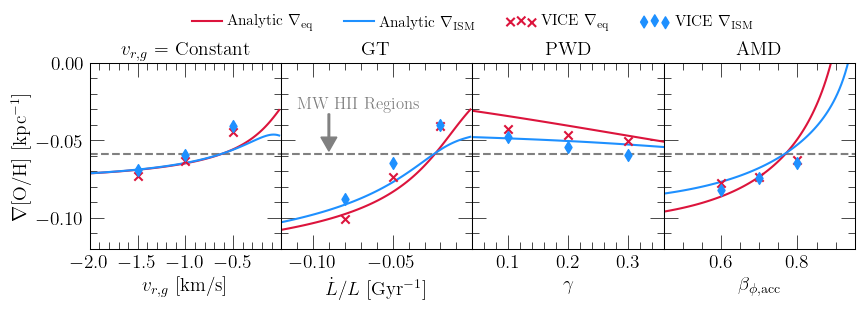

In [8]:
fig = plt.figure(figsize = (9, 3))
axes = []
for i in range(4):
    axes.append(fig.add_subplot(141 + i))
    if i: plt.setp(axes[i].get_yticklabels(), visible = False)
    axes[i].set_ylim([-0.12, 0.0])
    axes[i].set_yticks([-0.1, -0.05, 0])
    # axes[i].tick_params(labelsize = 11)
axes[0].set_ylabel(r"$\nabla$[O/H] [kpc$^{-1}$]")

axes[0].set_title(r"$v_{r,g}$ = Constant")
axes[0].set_xlabel(r"$v_{r,g}$ [km/s]")
axes[0].set_xlim([-2, 0])
axes[0].set_xticks([-2, -1.5, -1, -0.5])

axes[1].set_title("GT")
axes[1].set_xlabel(r"$\dot L / L$ [Gyr$^{-1}$]")
axes[1].set_xlim([-0.12, 0])
axes[1].set_xticks([-0.1, -0.05])

axes[2].set_title(r"PWD")
axes[2].set_xlabel(r"$\gamma$")
axes[2].set_xlim([0.04, 0.36])

axes[3].set_title("AMD")
axes[3].set_xlabel(r"$\beta_{\phi,\text{acc}}$")
axes[3].set_xlim([0.45, 0.95])

numerical_eq = [
    {-0.5: -0.0445, -1.0: -0.0634, -1.5: -0.0730},
    {-0.02: -0.0407, -0.05: -0.0738, -0.08: -0.101},
    {0.1: -0.0425, 0.2: -0.0467, 0.3: -0.0504},
    {0.8: -0.0625, 0.7: -0.0734, 0.6: -0.0774}
]
numerical_ism = [
    {-0.5: -0.0408, -1.0: -0.0595, -1.5: -0.0692},
    {-0.02: -0.0404, -0.05: -0.0646, -0.08: -0.0877},
    {0.1: -0.0480, 0.2: -0.0544, 0.3: -0.0597},
    {0.8: -0.0647, 0.7: -0.0746, 0.6: -0.0824}
]

xvals = np.linspace(axes[0].get_xlim()[0], axes[0].get_xlim()[1], 100)
soln = [const().gradeq(4, x) for x in xvals]
# soln = [const().gradeq(6, x) for x in xvals]
yvals = [_.deqlnzdr / m.log(10) for _ in soln]
axes[0].plot(xvals, yvals, c = named_colors()["crimson"], label = r"Analytic $\nabla_\text{eq}$")
yvals = [_.dlnzismdr / m.log(10) for _ in soln]
axes[0].plot(xvals, yvals, c = named_colors()["dodgerblue"], label = r"Analytic $\nabla_\text{ISM}$")

xvals = np.linspace(axes[1].get_xlim()[0], axes[1].get_xlim()[1], 100)
soln = [gt().gradeq(4, gt.vgas(x)) for x in xvals]
yvals = [_.deqlnzdr / m.log(10) for _ in soln]
axes[1].plot(xvals, yvals, c = named_colors()["crimson"], label = r"Analytic $\nabla_\text{eq}$")
yvals = [_.dlnzismdr / m.log(10) for _ in soln]
axes[1].plot(xvals, yvals, c = named_colors()["dodgerblue"], label = r"Analytic $\nabla_\text{ISM}$")

xvals = np.linspace(axes[2].get_xlim()[0], axes[2].get_xlim()[1], 100)
soln = [pwd().gradeq(4, pwd.vgas(x)) for x in xvals]
# soln = [pwd().gradeq(6, pwd.vgas(x)) for x in xvals]
yvals = [_.deqlnzdr / m.log(10) for _ in soln]
axes[2].plot(xvals, yvals, c = named_colors()["crimson"], label = r"Analytic $\nabla_\text{eq}$")
yvals = [_.dlnzismdr / m.log(10) for _ in soln]
axes[2].plot(xvals, yvals, c = named_colors()["dodgerblue"], label = r"Analytic $\nabla_\text{ISM}$")

inputs.RADIAL_GAS_FLOWS = "angular_momentum_dilution"
xvals = np.linspace(axes[3].get_xlim()[0], axes[3].get_xlim()[1], 100)
soln = []
mw = diskmodel(spec = "insideout")
for i in range(len(xvals)):
    driver = angular_momentum_dilution(mw, beta_phi_in = xvals[i], outfilename = None)
    radii, vgas = driver(13.2)
    idx = radii.index(8)
    # print("%.2e  %.2e" % (xvals[i], vgas[idx]))
    soln.append(amd().gradeq(4, vgas[idx], betaphiin = xvals[i]))
    # soln.append(amd().gradeq(6, vgas[idx], betaphiin = xvals[i]))
yvals = [_.deqlnzdr / m.log(10) for _ in soln]
axes[3].plot(xvals, yvals, c = named_colors()["crimson"], label = r"Analytic $\nabla_\text{eq}$")
yvals = [_.dlnzismdr / m.log(10) for _ in soln]
axes[3].plot(xvals, yvals, c = named_colors()["dodgerblue"], label = r"Analytic $\nabla_\text{ISM}$")

for i in range(len(axes)):
    kwargs = {
        "c": named_colors()["crimson"],
        "marker": markers()["x"],
        "label": r"VICE $\nabla_\text{eq}$",
        "zorder": 1000
    }
    xvals = numerical_eq[i].keys()
    yvals = [numerical_eq[i][x] for x in xvals]
    axes[i].scatter(xvals, yvals, **kwargs)
    kwargs["c"] = named_colors()["dodgerblue"]
    kwargs["marker"] = markers()["thin_diamond"]
    kwargs["label"] = r"VICE $\nabla_\text{ISM}$"
    xvals = numerical_ism[i].keys()
    yvals = [numerical_ism[i][x] for x in xvals]
    axes[i].scatter(xvals, yvals, **kwargs)
    axes[i].axhline(-0.059, c = named_colors()["grey"], linestyle = "--", zorder = -1000)

# kwargs = {
#     "loc": mpl_loc("upper left"),
#     "bbox_to_anchor": (0.02, 0.98),
#     "ncol": 1,
#     "handlelength": 2,
#     "scatterpoints": 3,
#     "fontsize": 10
# }
# leg = axes[3].legend(**kwargs)
kwargs = {
    "loc": mpl_loc("lower center"),
    "bbox_to_anchor": (0.0, 1.1),
    "ncol": 4,
    "handlelength": 2,
    "scatterpoints": 3,
    "fontsize": 11
}
leg = axes[2].legend(**kwargs)

axes[1].text(-0.11, -0.03, r"MW HII Regions", color = named_colors()["grey"], fontsize = 12)
axes[1].arrow(-0.09, -0.033, 0, -0.015, color = named_colors()["grey"],
    head_width = 0.01, head_length = 0.009)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, bottom = 0.18, right = 0.97, top = 0.8, left = 0.12)
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./analytic/gradients-vs-vice.%s" % (ext), **kwargs)
plt.show()